In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0)

In [2]:
svm = pd.read_csv('Attrition.csv')

In [3]:
svm = svm.iloc[:, 1:]
svm.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
442,36,No,Non-Travel,635,Sales,10,4,Medical,2,Male,...,3,4,0,10,3,2,10,3,9,7
1091,33,No,Travel_Rarely,575,Research & Development,25,3,Life Sciences,4,Male,...,3,4,0,5,2,3,5,3,0,2
981,35,Yes,Travel_Frequently,662,Sales,18,4,Marketing,4,Female,...,3,3,1,5,0,2,4,2,3,2
785,40,No,Travel_Rarely,1492,Research & Development,20,4,Technical Degree,1,Male,...,4,4,1,14,6,3,11,10,11,1
1332,29,Yes,Travel_Frequently,459,Research & Development,24,2,Life Sciences,4,Male,...,4,2,0,1,3,2,1,0,1,0


In [4]:
svm.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSinceLastPromotion       16
YearsWithC

In [5]:
svm.select_dtypes(include=['object']).dtypes

Attrition         object
BusinessTravel    object
Department        object
EducationField    object
Gender            object
JobRole           object
MaritalStatus     object
OverTime          object
dtype: object

In [6]:
svm['Attrition'] = svm['Attrition'].replace({'No':0, 'Yes':1})
svm['Gender'] = svm['Gender'].replace({'Female':0, 'Male':1})
svm['OverTime'] = svm['OverTime'].replace({'No':0, 'Yes':1})

In [7]:
from sklearn.preprocessing import LabelEncoder

# Tạo một instance của LabelEncoder
le = LabelEncoder()

# Áp dụng label encoding cho các cột
svm['BusinessTravel'] = le.fit_transform(svm['BusinessTravel'])
svm['Department'] = le.fit_transform(svm['Department'])
svm['EducationField'] = le.fit_transform(svm['EducationField'])
svm['JobRole'] = le.fit_transform(svm['JobRole'])
svm['MaritalStatus'] = le.fit_transform(svm['MaritalStatus'])

In [8]:
svm

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,...,3,4,0,17,3,2,9,6,0,8


In [9]:
x = svm.drop(['Attrition'], axis=1)
y = svm['Attrition']

In [10]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_sm, y_sm = smote.fit_resample(x,y)
print(y_sm.value_counts())

1    1233
0    1233
Name: Attrition, dtype: int64


In [11]:
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,2,0,94,...,3,1,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,3,1,61,...,4,4,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,4,1,92,...,3,2,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,4,0,56,...,3,3,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,1,40,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,23,2,3,3,1,41,...,3,3,1,17,3,3,5,2,0,3
1466,39,2,613,1,6,1,3,4,1,42,...,3,1,1,9,5,3,7,7,1,7
1467,27,2,155,1,4,3,1,2,1,87,...,4,2,1,6,0,3,6,2,0,3
1468,49,1,1023,2,2,3,3,4,1,63,...,3,4,0,17,3,2,9,6,0,8


In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_sm)
x_norm = pd.DataFrame(x_scaled, columns=x_sm.columns)

In [13]:
x_norm

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.547619,1.0,0.715820,1.0,0.000000,0.25,0.2,0.333333,0.0,0.914286,...,0.0,0.000000,0.000000,0.200,0.000000,0.000000,0.150,0.222222,0.000000,0.294118
1,0.738095,0.5,0.126700,0.5,0.250000,0.00,0.2,0.666667,1.0,0.442857,...,1.0,1.000000,0.333333,0.250,0.500000,0.666667,0.250,0.388889,0.066667,0.411765
2,0.452381,1.0,0.909807,0.5,0.035714,0.25,0.8,1.000000,1.0,0.885714,...,0.0,0.333333,0.000000,0.175,0.500000,0.666667,0.000,0.000000,0.000000,0.000000
3,0.357143,0.5,0.923407,0.5,0.071429,0.75,0.2,1.000000,0.0,0.371429,...,0.0,0.666667,0.000000,0.200,0.500000,0.666667,0.200,0.388889,0.200000,0.000000
4,0.214286,1.0,0.350036,0.5,0.035714,0.00,0.6,0.000000,1.0,0.142857,...,0.0,1.000000,0.333333,0.150,0.500000,0.666667,0.050,0.111111,0.133333,0.117647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,0.309524,0.5,0.507516,0.5,0.428571,0.25,0.6,0.333333,1.0,0.485714,...,0.0,0.333333,0.333333,0.075,0.666667,0.333333,0.050,0.111111,0.066667,0.117647
2462,0.142857,0.5,0.857552,0.5,0.214286,0.50,0.2,0.000000,0.0,0.342857,...,0.0,1.000000,0.333333,0.125,0.500000,0.666667,0.125,0.111111,0.000000,0.117647
2463,0.452381,1.0,0.632785,0.5,0.071429,0.50,0.4,0.666667,1.0,0.728571,...,0.0,0.000000,0.333333,0.175,0.333333,0.666667,0.125,0.111111,0.000000,0.176471
2464,0.285714,0.5,0.057266,0.5,0.535714,0.25,0.2,0.666667,0.0,0.185714,...,0.0,0.333333,0.000000,0.100,0.500000,0.333333,0.075,0.111111,0.000000,0.058824


In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_norm, y_sm, test_size = 0.2, random_state = 42, stratify = y_sm)

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [16]:
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1],
              'kernel': ['linear']}

In [17]:
grid = GridSearchCV(SVC(probability=True), param_grid, cv=5, verbose=2, refit=True)

In [18]:
grid.fit(x_train, y_train.values.ravel())

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.1s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.1s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.1s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.1s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.1s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.2s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.1s
[CV] END ....................C=0.1, gamma=0.1, k

GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['linear']},
             verbose=2)

In [19]:
grid.best_params_

{'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}

In [20]:
grid.best_estimator_

SVC(C=0.1, gamma=0.001, kernel='linear', probability=True)

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [22]:
pred = grid.predict(x_test)

In [23]:
x_train_pred = grid.predict(x_train)
train_acc = accuracy_score(x_train_pred, y_train)*100
print('Độ chính xác của tập train:',train_acc)

Độ chính xác của tập train: 83.77281947261663


In [24]:
y_pred = grid.predict(x_test)
test_acc = accuracy_score(y_pred, y_test)*100
print('Độ chính xác của tập test:',test_acc)

Độ chính xác của tập test: 81.9838056680162


Classification Report of GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['linear']},
             verbose=2) model is:
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       247
           1       0.84      0.79      0.81       247

    accuracy                           0.82       494
   macro avg       0.82      0.82      0.82       494
weighted avg       0.82      0.82      0.82       494

Confusion Matrix of GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['linear']},
             verbose=2) model is:


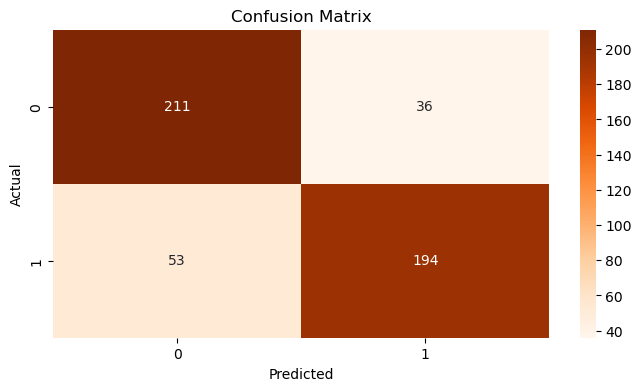

In [25]:
print(f'Classification Report of {grid} model is:')
print(classification_report(y_test,y_pred))
print(f'Confusion Matrix of {grid} model is:')
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,4))
sns.heatmap(cm,annot=True,fmt='g',cmap='Oranges')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

ROC - AUC Curve of GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['linear']},
             verbose=2) model is:


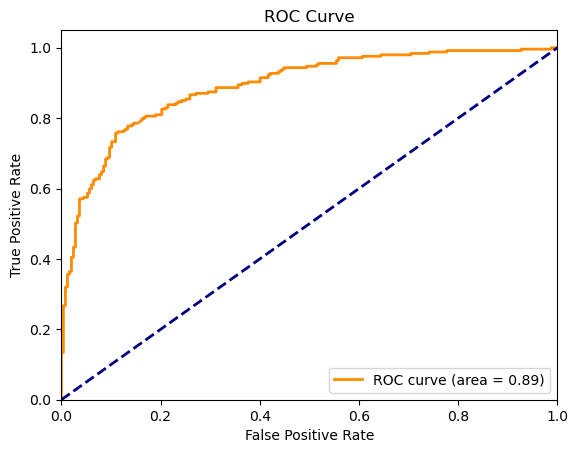

In [26]:
# Vẽ đường cong ROC
from sklearn.metrics import roc_curve, auc

print(f"ROC - AUC Curve of {grid} model is:")
y_pred_prob = grid.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       247
           1       0.84      0.79      0.81       247

    accuracy                           0.82       494
   macro avg       0.82      0.82      0.82       494
weighted avg       0.82      0.82      0.82       494



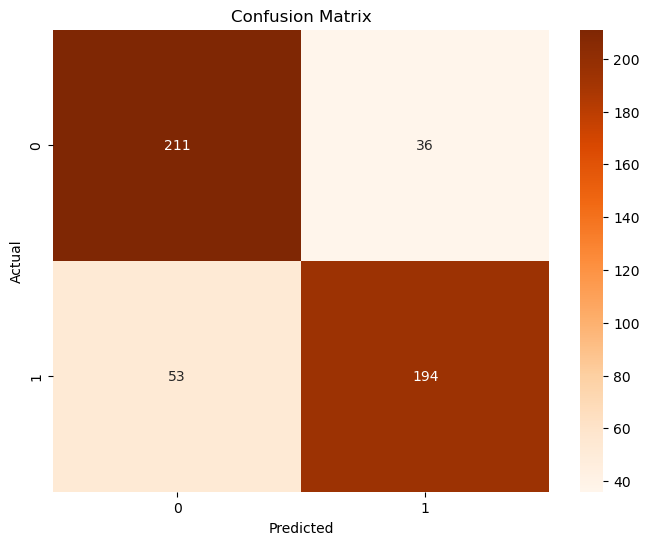

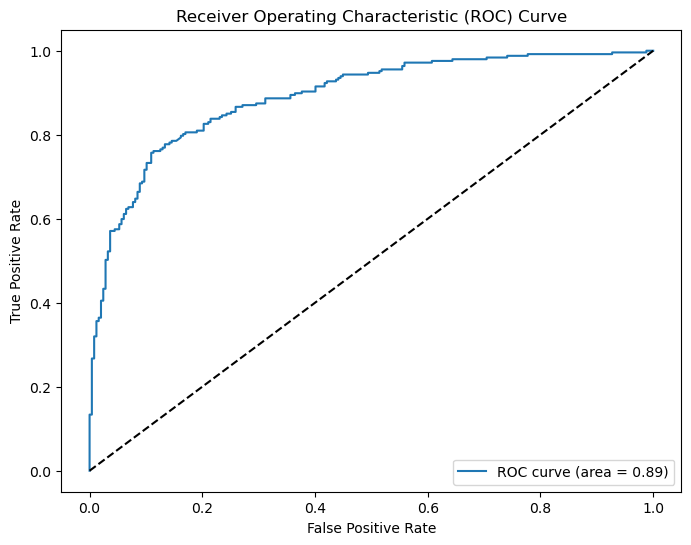

In [26]:
# Dự đoán trên tập kiểm tra
y_pred = grid.predict(x_test)
y_pred_prob = grid.predict_proba(x_test)[:, 1]

# In báo cáo đánh giá mô hình
print(classification_report(y_test, y_pred))

# Vẽ ma trận nhầm lẫn (confusion matrix)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix,annot=True,fmt='g',cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Vẽ đồ thị ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()